In [1]:
#import library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read data csv yang telah di scrapping sebelumnya

df = pd.read_csv('/content/drive/MyDrive/Semester 4/Big Data/Kelompok/indomaret.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1801066753528856772,Thu Jun 13 01:39:10 +0000 2024,0,udh pulang lagi di Indomaret ehhh baru masuk d...,1801066753528856772,NaN,NaN,in,bangtan♡,0,0,0,https://x.com/cappuccinojinnn/status/180106675...,1523994187926237187,cappuccinojinnn
1,1801065842551267459,Thu Jun 13 01:35:33 +0000 2024,0,KACAU ENAK BANGET NI AIR KELAPA INDOMARET. HYD...,1801065842551267459,https://pbs.twimg.com/media/GP6rx5HbEAELuI5.jpg,NaN,in,FUB free. MDNI.,0,0,0,https://x.com/kxiyong/status/1801065842551267459,1300876682446815232,kxiyong
2,1800866037199741204,Thu Jun 13 01:34:56 +0000 2024,0,@antasidadown Maunya indomaret ️,1801065688175616436,NaN,antasidadown,in,rant,0,0,0,https://x.com/aelpanas/status/1801065688175616436,1559242174604410880,aelpanas
3,1801064285722092016,Thu Jun 13 01:29:54 +0000 2024,0,@delidolu99mm ini mah sudah pasti keren banget...,1801064417830089137,NaN,delidolu99mm,in,LINK GACOR ➡️,0,0,0,https://x.com/rivainds84/status/18010644178300...,934794882350178304,rivainds84
4,1800527569923829885,Thu Jun 13 01:25:37 +0000 2024,0,@FestCrypto Aku juga kak kerja di web3 ngehand...,1801063342884499896,NaN,FestCrypto,in,NaN,0,0,0,https://x.com/framthatone/status/1801063342884...,1612773069155864576,framthatone


In [6]:
#pilih attribut mana saja yang akan di ambil
df = df[['full_text', 'username', 'created_at']]
df

,full_text,username,created_at
0,udh pulang lagi di Indomaret ehhh baru masuk d...,cappuccinojinnn,Thu Jun 13 01:39:10 +0000 2024
1,KACAU ENAK BANGET NI AIR KELAPA INDOMARET. HYD...,kxiyong,Thu Jun 13 01:35:33 +0000 2024
2,@antasidadown Maunya indomaret ️,aelpanas,Thu Jun 13 01:34:56 +0000 2024
3,@delidolu99mm ini mah sudah pasti keren banget...,rivainds84,Thu Jun 13 01:29:54 +0000 2024
4,@FestCrypto Aku juga kak kerja di web3 ngehand...,framthatone,Thu Jun 13 01:25:37 +0000 2024
...,...,...,...
541,@caratenoid @Indomaret Halo sobat. Mohon maaf ...,KontakIndomaret,Tue Jun 11 07:16:45 +0000 2024
542,gpp lh numpang ngamdem d indomaret ntw tbak q ...,jjancqk,Tue Jun 11 07:11:17 +0000 2024
543,Yang rasa kuah ayam bawang gak kalau enak dr y...,koesbhiantari,Tue Jun 11 07:10:01 +0000 2024
544,Nyobain edisi summernya indomaret point yg pea...,violetonpeach,Tue Jun 11 07:08:36 +0000 2024


In [7]:
df.shape

(546, 3)

**1. Cleaning Data**

In [8]:
df = df.drop_duplicates(subset=['full_text'])

In [9]:
df.duplicated().sum()

0

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [12]:
df.shape

(545, 3)

In [13]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#\w+', '', text)  # hapus hastag
    text = re.sub(r'RT[\s]+', '', text)  # hapus Retweet
    text = re.sub(r'https?://\S+', '', text)  # hapus url

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # hapus karakter non alpha numeric
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [14]:
df['full_text'] = df['full_text'].str.lower()

In [15]:
df

,full_text,username,created_at
0,udh pulang lagi di indomaret ehhh baru masuk d...,cappuccinojinnn,Thu Jun 13 01:39:10 +0000 2024
1,kacau enak banget ni air kelapa indomaret hydr...,kxiyong,Thu Jun 13 01:35:33 +0000 2024
2,maunya indomaret,aelpanas,Thu Jun 13 01:34:56 +0000 2024
3,ini mah sudah pasti keren banget udah gacor wd...,rivainds84,Thu Jun 13 01:29:54 +0000 2024
4,aku juga kak kerja di web3 ngehandle 2 project...,framthatone,Thu Jun 13 01:25:37 +0000 2024
...,...,...,...
541,halo sobat mohon maaf atas ketidaknyamannya ji...,KontakIndomaret,Tue Jun 11 07:16:45 +0000 2024
542,gpp lh numpang ngamdem d indomaret ntw tbak q ...,jjancqk,Tue Jun 11 07:11:17 +0000 2024
543,yang rasa kuah ayam bawang gak kalau enak dr y...,koesbhiantari,Tue Jun 11 07:10:01 +0000 2024
544,nyobain edisi summernya indomaret point yg pea...,violetonpeach,Tue Jun 11 07:08:36 +0000 2024


**2. Preprocessing Data**
- normalisasi
- stopword
- Tokenize
- Stemming

In [20]:
#normalisasi

norm = {'yg' : 'yang', 'bkn':'tidak', 'anak2':'anak-anak', 'sy':'saya',
        'dgn':'dengan', 'dr':'dari','utk':'untuk','tdk':'tidak','emng':'emang','kpn':'kapan',
        'gpp' : 'tidak apa-apa', 'lh': 'lah', 'iini':'ini', 'ni' : 'ini', 'jngn' : 'jangan', 'tp': 'tapi', 'ekwkw':'',
        'tbk': 'tebak', 'bngt': 'banget', 'blm': 'belum', 'gw':'saya', 'wd':'withdraw', 'web3':'web', 'gua' : 'saya', 'gue' : 'saya', 'blom' : 'belum', 'anj':'', 'dpn': 'depan', 'dmn' : 'dimana', 'lgsng':'langsung',
        'bgt' : 'banget', 'ampe':'sampai', 'knp':'kenapa', 'brhnti' : 'berhenti', 'berenti':'berhenti',
        'skrg':'sekarang', 'nnti':'nanti', 'udh' : 'sudah', 'gapercaya' : 'tidak percaya', 'dskn':'diskon',
        'sllu':'selalu', 'dpet':'dapat', 'krna': 'karena', 'krng':'kurang', 'sklian':'sekalian', 'akhrnya' : 'akhirnya',
        'lma' : 'lama', 'mnuman':'minuman', 'mknan':'makanan', 'mkn':'makan', 'mnum':'minum', 'bli':'beli', }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i,norm[i])
  return str_text
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df


,full_text,username,created_at
0,pulang indomaret ehhh baru masuk di sambut lag...,cappuccinojinnn,Thu Jun 13 01:39:10 +0000 2024
1,kacau enak banget air kelapa indomaret hydario...,kxiyong,Thu Jun 13 01:35:33 +0000 2024
2,maunya indomaret,aelpanas,Thu Jun 13 01:34:56 +0000 2024
3,iini mah keren banget udah gacor withdraw past...,rivainds84,Thu Jun 13 01:29:54 +0000 2024
4,aku kak kerja web ngehandle 2 project besar di...,framthatone,Thu Jun 13 01:25:37 +0000 2024
...,...,...,...
541,halo sobat mohon maaf atas ketidaknyamannya ad...,KontakIndomaret,Tue Jun 11 07:16:45 +0000 2024
542,apa-apa lah numpang ngamdem d indomaret ntw tb...,jjancqk,Tue Jun 11 07:11:17 +0000 2024
543,rasa kuah ayam bawang gak kalau enak indomie g...,koesbhiantari,Tue Jun 11 07:10:01 +0000 2024
544,nyobain edisi summernya indomaret point peach ...,violetonpeach,Tue Jun 11 07:08:36 +0000 2024


In [21]:
!pip install Sastrawi

In [22]:
#stopword

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["yang", "dan", "di", "dari", "ke", "pada", "untuk", "adalah", "dengan", "itu", "ini", "dalam", "bisa", "karena",
                   "jika", "sebagai", "atau", "akan", "saya", "kami", "mereka", "anda", "kita", "sesuatu", "seseorang", "beberapa",
                   "semua", "banyak", "sedikit", "lain", "satu", "dua", "tiga", "empat", "lima", "enam", "tujuh", "delapan", "sembilan",
                   "sepuluh", "seratus", "ribu", "juta", "miliar", "triliun"]


stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,pulang indomaret ehhh baru masuk sambut lagu p...,cappuccinojinnn,Thu Jun 13 01:39:10 +0000 2024
1,kacau enak banget air kelapa indomaret hydario...,kxiyong,Thu Jun 13 01:35:33 +0000 2024
2,maunya indomaret,aelpanas,Thu Jun 13 01:34:56 +0000 2024
3,iini mah keren banget udah gacor withdraw diba...,rivainds84,Thu Jun 13 01:29:54 +0000 2024
4,aku kak kerja web ngehandle 2 project besar di...,framthatone,Thu Jun 13 01:25:37 +0000 2024


In [23]:
#tokenize

tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0      [pulang, indomaret, ehhh, baru, masuk, sambut,...
1      [kacau, enak, banget, air, kelapa, indomaret, ...
2                                    [maunya, indomaret]
3      [iini, mah, keren, banget, udah, gacor, withdr...
4      [aku, kak, kerja, web, ngehandle, 2, project, ...
                             ...                        
541    [halo, sobat, mohon, maaf, atas, ketidaknyaman...
542    [apa-apa, lah, numpang, ngamdem, d, indomaret,...
543    [rasa, kuah, ayam, bawang, gak, kalau, enak, i...
544    [nyobain, edisi, summernya, indomaret, point, ...
545            [saatnya, buka, saingan, buat, indomaret]
Name: full_text, Length: 545, dtype: object

In [24]:
#stemming ( mengubah kata imbuhan menjadi kata dasar, contoh : dimana menjadi mana)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/Semester 4/Big Data/Kelompok/hasilprocessingindomaret.csv", index=False)

pulang indomaret ehhh baru masuk sambut lagu ptd bangtan ssksksksk
kacau enak banget air kelapa indomaret hydariococo tiati kata sayae
mau indomaret
iini mah keren banget udah gacor withdraw bayar kemaren pernah rungkad tetap puas main disiini soal layan raja mantap dah kaya apotek tutup soal gaada obat
aku kak kerja web ngehandle 2 project besar antara pi network sama hamster kombat udah cair dana indomaret
indomaret samping bapak bapak umur 60 an main slot co
sedih gak bagi oiinigiri indomaret
indomaret kak
aku lebih suka indomaret si
tanah jual pinggir laut desa lahokrukam kab aceh selatan kec tapaktuan tanah iini cocok buat lokasi market
pliss jangan ingetin insiden indomaret jebak ujan huhu
ir indomaret deket st bekas cuma stroberi leci sama anggur iini iw mana coba stroberi maiinis banget lagimending mangga leci
indomaret deket kost nyata mogu mogu minwon
karyawan alfamart sama karyawan indomaret kalau pacar ngga restu manajer cerita kaya romeo and juliet endingnya bukan minum ra

**3. Translate**

In [25]:
!pip install translate

In [26]:
data = pd.read_csv("/content/drive/MyDrive/Semester 4/Big Data/Kelompok/hasilprocessingindomaret.csv", encoding = 'latin1')
data.head()

,full_text
0,pulang indomaret ehhh baru masuk sambut lagu p...
1,kacau enak banget air kelapa indomaret hydario...
2,mau indomaret
3,iini mah keren banget udah gacor withdraw baya...
4,aku kak kerja web ngehandle 2 project besar an...


In [28]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang='en', from_lang='id')
  translation = translator.translate(tweet)
  return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv("/content/drive/MyDrive/Semester 4/Big Data/Kelompok/translateenglishindomaret.csv")


In [29]:
data = pd.read_csv('/content/drive/MyDrive/Semester 4/Big Data/Kelompok/translateenglishindomaret.csv',index_col=0)
data.head()

,full_text,tweet_english
0,pulang indomaret ehhh baru masuk sambut lagu p...,go home indomaret ehhh just entered welcome th...
1,kacau enak banget air kelapa indomaret hydario...,chaotic delicious coconut water indomaret hyda...
2,mau indomaret,want indomaret
3,iini mah keren banget udah gacor withdraw baya...,iini mah really cool already gacor withdraw pa...
4,aku kak kerja web ngehandle 2 project besar an...,i work web ngehandle 2 big projects between pi...


**4. Labeling**

In [30]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
#proses labeling

# Menggunakan Text Blob
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('positif')
  elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('netral')
  else:
      total_negatif +=1
      status.append('Negatif')

  total += 1

print(f'hasil analisis data:\nPositif = {total_positif}\nNetral ={total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')


hasil analisis data:
Positif = 419
Netral =97
Negatif = 29

Total Data: 545


In [33]:
#tampilkan data
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pulang indomaret ehhh baru masuk sambut lagu p...,go home indomaret ehhh just entered welcome th...,positif
1,kacau enak banget air kelapa indomaret hydario...,chaotic delicious coconut water indomaret hyda...,positif
2,mau indomaret,want indomaret,netral
3,iini mah keren banget udah gacor withdraw baya...,iini mah really cool already gacor withdraw pa...,positif
4,aku kak kerja web ngehandle 2 project besar an...,i work web ngehandle 2 big projects between pi...,netral
...,...,...,...
540,halo sobat mohon maaf atas ketidaknyamannya ad...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif
541,apa lah numpang ngamdem d indomaret ntw tbak q...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif
542,rasa kuah ayam bawang gak kalau enak indomie g...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif
543,nyobain edisi summernya indomaret point peach ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif


**5. Visualisasi**

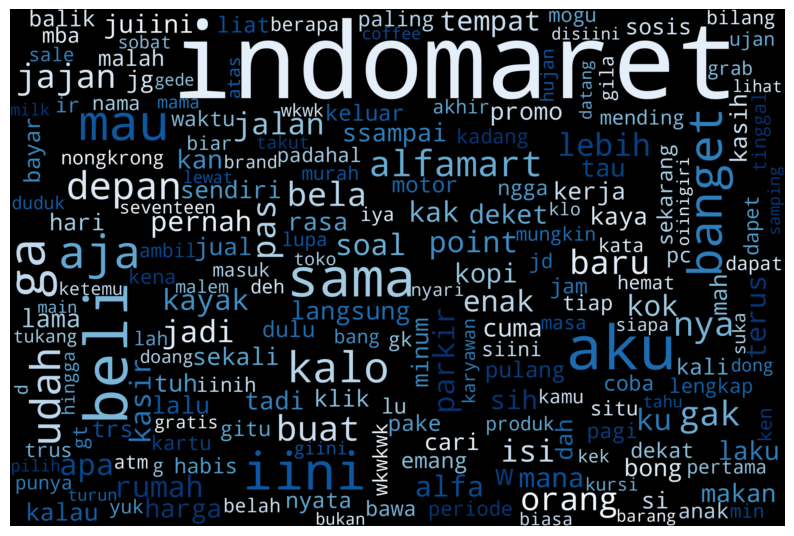

In [34]:
#visualisasi WordCloud ( Kemunculan Kata)
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color='black',
    colormap="Blues_r",
    collocations = False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)


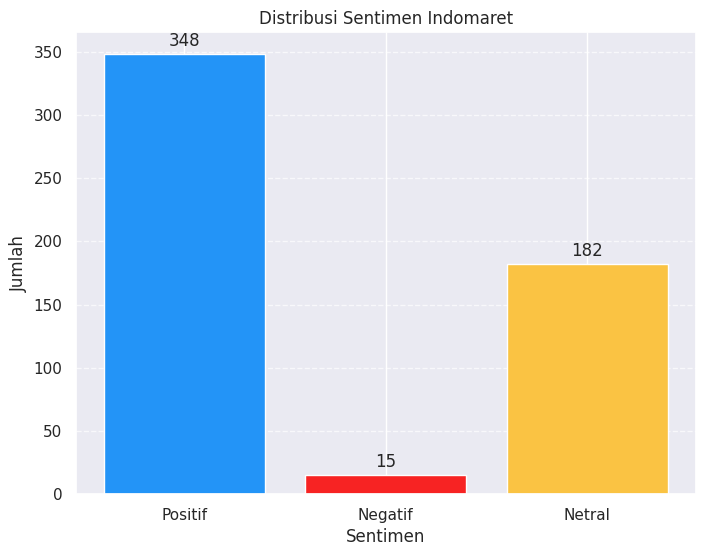

In [41]:
#visualisasi Sentimen

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels,counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
      height = bar.get_height()
      ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                  xytext=(0,3),
                  textcoords='offset points',
                  ha='center',va='bottom')
  ax.grid(axis='y', linestyle='--',alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels,counts,'Distribusi Sentimen Indomaret')

**6. Klasifikasi Sentimen Menggunaakan Naive Bayes Clasifier**

In [36]:
dataset = data.drop(['full_text'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [37]:
#train data

import random

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
  if(n[1] == 'Positif'):
    set_positif.append(n)
  elif(n[1] == 'Negatif'):
    set_negatif.append(n)
  else:
    set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
  train_set.append(n)


In [38]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print("Akuran Test:", cl.accuracy(dataset))

Akuran Test: 0.8311926605504587


In [39]:
# Labeling with Naive Bayes

data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'positif':
      total_positif += 1
    elif analysis.classify() == 'netral':
      total_netral += 1
    else:
      total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'Total Data : {total}')




Hasil Analisis Data:
Positif = 348
Netral = 182
Negatif = 15
Total Data : 545


In [ ]:
# data_tweet = list(data['tweet_english'])

# total_positif = 0
# total_negatif = 0
# total_netral = 0
# total = 0

# status = []

# for tweet in data_tweet:
#     analysis = TextBlob(tweet, classifier=cl)
#     hasil_klasifikasi = analysis.classify()

#     if hasil_klasifikasi == 'Negatif':
#         total_negatif += 1
#     elif hasil_klasifikasi == 'Netral':
#         total_netral += 1
#     else:
#         total_positif += 1

#     status.append(hasil_klasifikasi)
#     total += 1

# print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
# print(f'Total Data : {total}')


Hasil Analisis Data:
Positif = 110
Netral = 0
Negatif = 2
Total Data : 112


In [40]:
status = pd.DataFrame({'Klasifikasi Bayes:': status})
data['klasifikasi_bayes'] = status

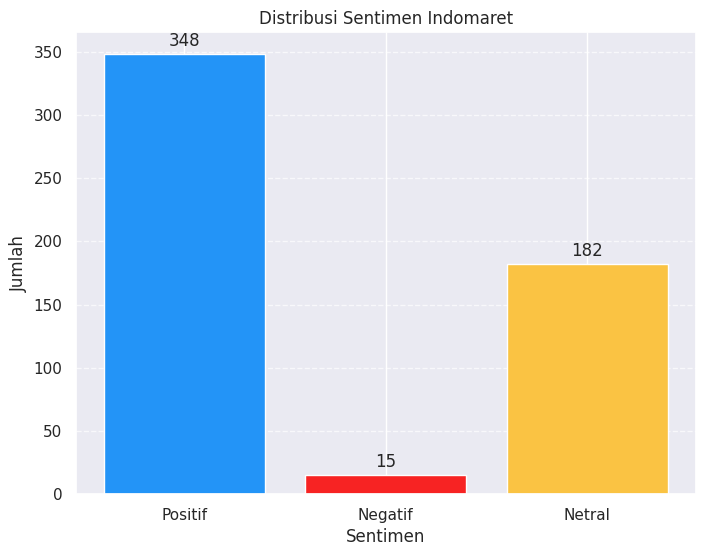

In [42]:
#visualisasi Sentimen

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels,counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
      height = bar.get_height()
      ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                  xytext=(0,3),
                  textcoords='offset points',
                  ha='center',va='bottom')
  ax.grid(axis='y', linestyle='--',alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels,counts,'Distribusi Sentimen Indomaret')

In [43]:
data

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pulang indomaret ehhh baru masuk sambut lagu p...,go home indomaret ehhh just entered welcome th...,positif,netral
1,kacau enak banget air kelapa indomaret hydario...,chaotic delicious coconut water indomaret hyda...,positif,netral
2,mau indomaret,want indomaret,netral,netral
3,iini mah keren banget udah gacor withdraw baya...,iini mah really cool already gacor withdraw pa...,positif,netral
4,aku kak kerja web ngehandle 2 project besar an...,i work web ngehandle 2 big projects between pi...,netral,netral
...,...,...,...,...
540,halo sobat mohon maaf atas ketidaknyamannya ad...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif,positif
541,apa lah numpang ngamdem d indomaret ntw tbak q...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif,positif
542,rasa kuah ayam bawang gak kalau enak indomie g...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif,positif
543,nyobain edisi summernya indomaret point peach ...,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,positif,positif
